In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
data = pd.read_csv('pelanggaran.csv')
data

,bulan,wilayah,bap_tilang,stop_operasi,bap_polisi,stop_operasi_polisi,penderekan,ocp_roda_dua,ocp_roda_empat,angkut_motor,tilang
0,Januari,Bidang Dalops,44,139,0,0,73,0,0,0,1
1,Januari,Sudinhub Jakarta Pusat,47,2,52,0,184,237,15,97,0
2,Januari,Sudinhub Jakarta Utara,166,27,0,0,174,0,0,0,1
3,Januari,Sudinhub Jakarta Selatan,44,1,0,0,61,42,75,0,0
4,Januari,Sudinhub Jakarta Barat,184,70,0,0,202,10,5,0,1
5,Januari,Sudinhub Jakarta Timur,191,141,0,0,137,0,0,0,0
6,Februari,Bidang Dalops,37,143,0,0,95,2,1,0,1
7,Februari,Sudinhub Jakarta Pusat,48,7,42,0,175,396,21,143,1
8,Februari,Sudinhub Jakarta Utara,251,27,31,0,255,3,0,0,1
9,Februari,Sudinhub Jakarta Selatan,129,12,0,0,155,446,110,0,0


In [27]:
display(data.dtypes, data.shape, data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bulan                42 non-null     object
 1   wilayah              42 non-null     object
 2   bap_tilang           42 non-null     int64 
 3   stop_operasi         42 non-null     int64 
 4   bap_polisi           42 non-null     int64 
 5   stop_operasi_polisi  42 non-null     int64 
 6   penderekan           42 non-null     int64 
 7   ocp_roda_dua         42 non-null     int64 
 8   ocp_roda_empat       42 non-null     int64 
 9   angkut_motor         42 non-null     int64 
 10  tilang               42 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 3.7+ KB


bulan                  object
wilayah                object
bap_tilang              int64
stop_operasi            int64
bap_polisi              int64
stop_operasi_polisi     int64
penderekan              int64
ocp_roda_dua            int64
ocp_roda_empat          int64
angkut_motor            int64
tilang                  int64
dtype: object

(42, 11)

None

In [28]:
data.isnull().sum()

bulan                  0
wilayah                0
bap_tilang             0
stop_operasi           0
bap_polisi             0
stop_operasi_polisi    0
penderekan             0
ocp_roda_dua           0
ocp_roda_empat         0
angkut_motor           0
tilang                 0
dtype: int64

In [29]:
data.drop(['bulan', 'wilayah','stop_operasi_polisi'], axis = 1, inplace= True)

In [30]:
x = data.drop('tilang', axis = 1)
y = data['tilang']

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
xtrain

,bap_tilang,stop_operasi,bap_polisi,penderekan,ocp_roda_dua,ocp_roda_empat,angkut_motor
34,176,81,0,157,62,6,0
4,184,70,0,202,10,5,0
40,36,32,0,29,0,0,0
5,191,141,0,137,0,0,0
38,224,20,24,54,0,0,19
19,93,21,0,166,99,5,117
23,274,113,0,264,0,0,0
6,37,143,0,95,2,1,0
1,47,2,52,184,237,15,97
7,48,7,42,175,396,21,143


In [36]:
mms = MinMaxScaler(feature_range=(0,1))

xtrain = mms.fit_transform(xtrain)
xtest = mms.fit_transform(xtest)
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

xtrain

,0,1,2,3,4,5,6
0,0.351178,0.393035,0.000000,0.464968,0.076923,0.054545,0.000000
1,0.368308,0.338308,0.000000,0.608280,0.012407,0.045455,0.000000
2,0.051392,0.149254,0.000000,0.057325,0.000000,0.000000,0.000000
3,0.383298,0.691542,0.000000,0.401274,0.000000,0.000000,0.000000
4,0.453961,0.089552,0.461538,0.136943,0.000000,0.000000,0.045894
5,0.173448,0.094527,0.000000,0.493631,0.122829,0.045455,0.282609
6,0.561028,0.552239,0.000000,0.805732,0.000000,0.000000,0.000000
7,0.053533,0.701493,0.000000,0.267516,0.002481,0.009091,0.000000
8,0.074946,0.000000,1.000000,0.550955,0.294045,0.136364,0.234300
9,0.077088,0.024876,0.807692,0.522293,0.491315,0.190909,0.345411


In [37]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10,50,100,200,300,400,500]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 1)
grid_search.fit(xtrain, ytrain)

print('\n')
print('Hyperparameter terbaik : ', grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Hyperparameter terbaik :  {'n_estimators': 200}


Models LogisticRegression



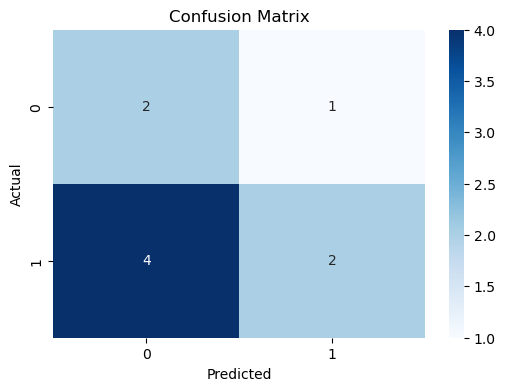

Classification Report : 
               precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.67      0.33      0.44         6

    accuracy                           0.44         9
   macro avg       0.50      0.50      0.44         9
weighted avg       0.56      0.44      0.44         9

Accuracy :  0.4444444444444444



In [40]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(model, xtest, ytest):
    ypred = model.predict(xtest)
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    plt.show()


lc_model = LogisticRegression()

models = [lc_model]

for model in models:
    model.fit(xtrain, ytrain)

    print('Models', model.__class__.__name__)
    print()
    ypred = model.predict(xtest)

    plot_confusion_matrix(model, xtest, ytest)
    probabilities = model.predict_proba(xtrain)[:, 1]  # Mengambil probabilitas kelas "1" (churn)

    xtrain['probabilities'] = [round(x * 100,2) for x in probabilities]

    print('Classification Report : \n', classification_report(ytest, ypred))
    print('Accuracy : ', accuracy_score(ytest, ypred))
    print()

In [48]:
xtrain

,0,1,2,3,4,5,6,probabilities
0,0.351178,0.393035,0.000000,0.464968,0.076923,0.054545,0.000000,46.69
1,0.368308,0.338308,0.000000,0.608280,0.012407,0.045455,0.000000,47.01
2,0.051392,0.149254,0.000000,0.057325,0.000000,0.000000,0.000000,41.88
3,0.383298,0.691542,0.000000,0.401274,0.000000,0.000000,0.000000,46.84
4,0.453961,0.089552,0.461538,0.136943,0.000000,0.000000,0.045894,55.72
5,0.173448,0.094527,0.000000,0.493631,0.122829,0.045455,0.282609,45.60
6,0.561028,0.552239,0.000000,0.805732,0.000000,0.000000,0.000000,50.20
7,0.053533,0.701493,0.000000,0.267516,0.002481,0.009091,0.000000,41.69
8,0.074946,0.000000,1.000000,0.550955,0.294045,0.136364,0.234300,60.28
9,0.077088,0.024876,0.807692,0.522293,0.491315,0.190909,0.345411,58.04


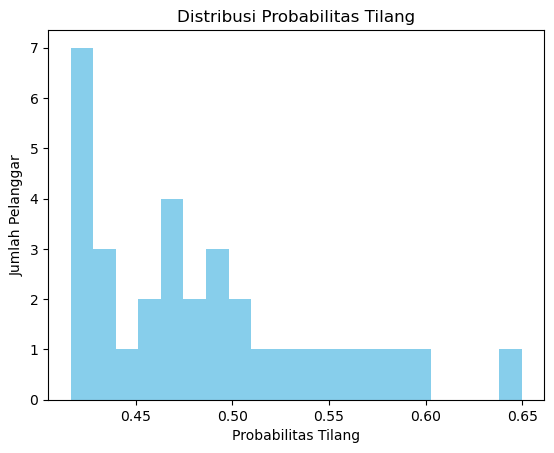

In [51]:
plt.hist(probabilities, bins=20, color='skyblue')
plt.xlabel('Probabilitas Tilang')
plt.ylabel('Jumlah Pelanggar')
plt.title('Distribusi Probabilitas Tilang')
plt.show()